# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:

lat_lngs = []

cities = []

lat_range = (-90, 90)
lng_range = (-180, 180)

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:

weather_api_key = '5b7732bc23960e326107c1f0c440a80d'
url = "https://api.openweathermap.org/data/2.5/weather?appid=%s&units=imperial&q=" % weather_api_key

city_data = []


print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

for i, city in enumerate(cities):
        
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = url + city 
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    record_count = record_count + 1 

    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather['dt']

        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except Exception as e: #Code snippet taken from: https://www.delftstack.com/howto/python/python-except-exception-as-e/
        print("City not found {}. Skipping...{}".format(city, e))
        pass
              
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | praia da vitoria
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | selfoss
Processing Record 5 of Set 1 | new amsterdam
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | afaahiti
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | novokruchininskiy
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | ebon
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | rio grande
Processing Record 14 of Set 1 | beitbridge
Processing Record 15 of Set 1 | queenstown
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | khorostkiv
Processing Record 18 of Set 1 | gamba
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | aasiaat
Processing Record 21 of Set 1 | petropavlovsk-kamchatsky
Processing Record 22 of Set 1 | bethel
Pr

In [4]:

city_data_df = pd.DataFrame(city_data)

city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,praia da vitoria,38.7333,-27.0667,68.76,68,40,8.84,PT,1716658999
1,lebu,-37.6167,-73.6500,53.78,65,100,5.84,CL,1716659000
2,waitangi,-43.9535,-176.5597,48.81,80,98,15.99,NZ,1716659000
3,selfoss,63.9331,-20.9971,53.04,72,28,24.09,IS,1716659001
4,new amsterdam,6.2500,-57.5167,75.70,97,100,3.47,GY,1716659001


In [6]:

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:

city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,praia da vitoria,38.7333,-27.0667,68.76,68,40,8.84,PT,1716658999
1,lebu,-37.6167,-73.6500,53.78,65,100,5.84,CL,1716659000
2,waitangi,-43.9535,-176.5597,48.81,80,98,15.99,NZ,1716659000
3,selfoss,63.9331,-20.9971,53.04,72,28,24.09,IS,1716659001
4,new amsterdam,6.2500,-57.5167,75.70,97,100,3.47,GY,1716659001


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

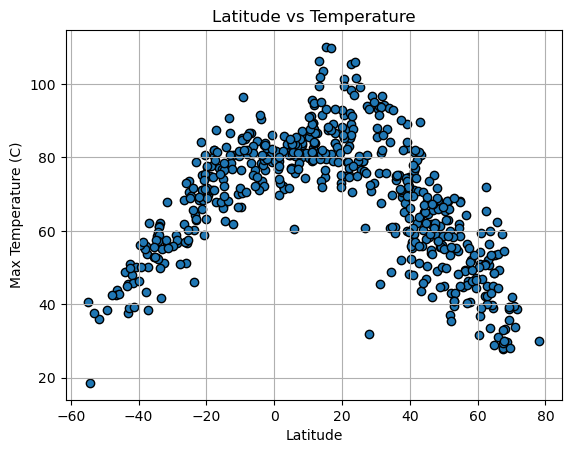

In [8]:
import matplotlib.pyplot as plt

x = city_data_df['Lat']
y = city_data_df['Max Temp']

plt.scatter(x, y, edgecolors='black')
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
plt.savefig("output_data/Fig1.png")

plt.show()

#### Latitude Vs. Humidity

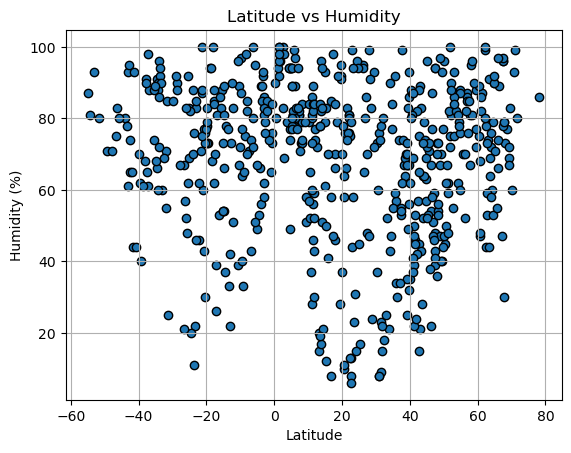

In [9]:
import matplotlib.pyplot as plt

x = city_data_df['Lat']
y = city_data_df['Humidity']

plt.scatter(x, y, edgecolors='black')
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig("output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

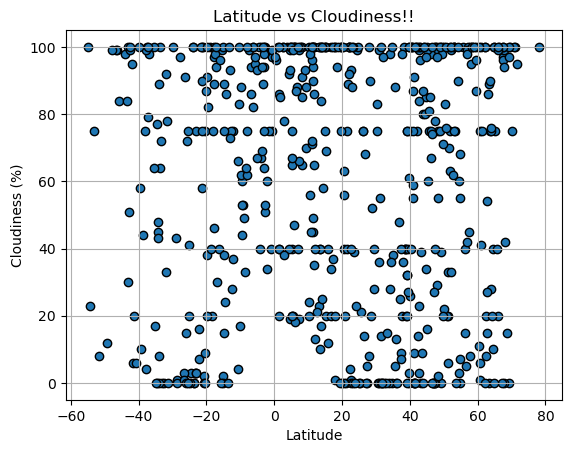

In [10]:
x = city_data_df['Lat']
y = city_data_df['Cloudiness']

plt.scatter(x, y, edgecolors='black')
plt.title('Latitude vs Cloudiness!!')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

plt.savefig("output_data/Fig3.png")

plt.show()

#### Latitude vs. Wind Speed Plot

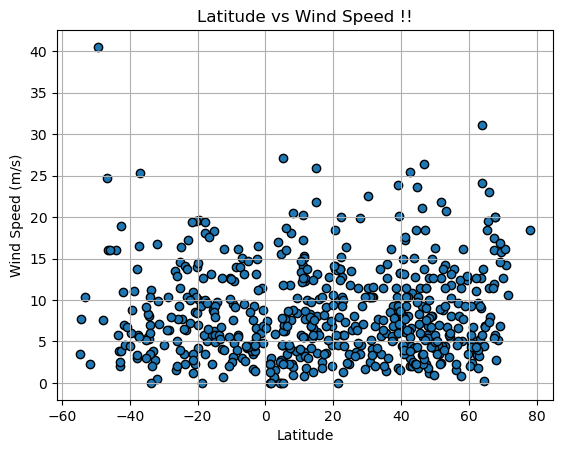

In [11]:
x = city_data_df['Lat']
y = city_data_df['Wind Speed']

plt.scatter(x, y, edgecolors='black')
plt.title('Latitude vs Wind Speed !!')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

plt.savefig("output_data/Fig4.png")

plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:

from sklearn.linear_model import LinearRegression

def display_regression(x, y, title, y_label, text_coordinates):
    First_x = np.array(x).reshape(-1, 1)
    First_y = np.array(y)

    model = LinearRegression().fit(First_x, First_y)
    slope = model.coef_[0]
    r_value = model.score(First_x, First_y)
    y_axis = model.intercept_


    y_pred = model.predict(First_x)
    plt.scatter(x, y)
    plt.plot(x, y_pred, color='red')

    equation = f'y = {slope:.2f}x + {y_axis:.2f} r = {r_value:.2f}'

    plt.annotate(equation, text_coordinates, fontsize = 12, color='red')

    plt.title(title)
    plt.xlabel('Lat')

    plt.ylabel(y_label)
    plt.show()

    return r_value


    



In [13]:

northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,praia da vitoria,38.7333,-27.0667,68.76,68,40,8.84,PT,1716658999
3,selfoss,63.9331,-20.9971,53.04,72,28,24.09,IS,1716659001
4,new amsterdam,6.2500,-57.5167,75.70,97,100,3.47,GY,1716659001
8,novokruchininskiy,51.7833,113.7667,37.13,75,63,2.42,RU,1716659003
9,college,64.8569,-147.8028,48.52,90,100,6.91,US,1716659004


In [14]:

southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lebu,-37.6167,-73.6500,53.78,65,100,5.84,CL,1716659000
2,waitangi,-43.9535,-176.5597,48.81,80,98,15.99,NZ,1716659000
5,adamstown,-25.0660,-130.1015,70.59,69,41,14.63,PN,1716659002
6,afaahiti,-17.7500,-149.2833,80.47,85,89,18.10,PF,1716659002
7,port-aux-francais,-49.3500,70.2167,38.55,71,12,40.53,TF,1716659003


###  Temperature vs. Latitude Linear Regression Plot

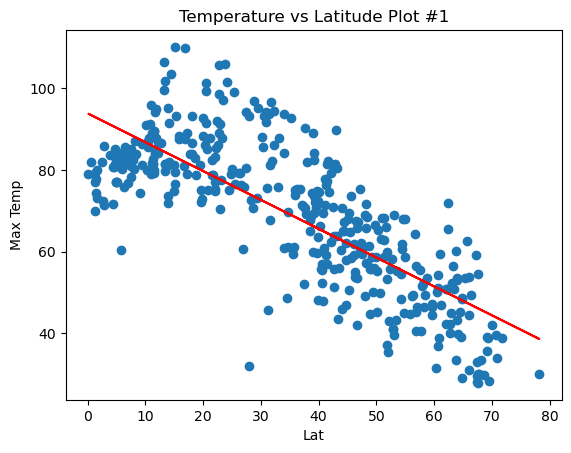

The FINAL R Value =  0.6164692614427194
Discussion = As you move away from the equator, there is a tendency for temperature to increase as well based on the R Value of 0.616


In [30]:

from sklearn.linear_model import LinearRegression

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

rv_1 = display_regression(x, y, 'Temperature vs Latitude Plot #1', 'Max Temp', (18,0))

print("The FINAL R Value = ", rv_1)
print('Discussion = As you move away from the equator, there is a tendency for temperature to increase as well based on the R Value of 0.616')

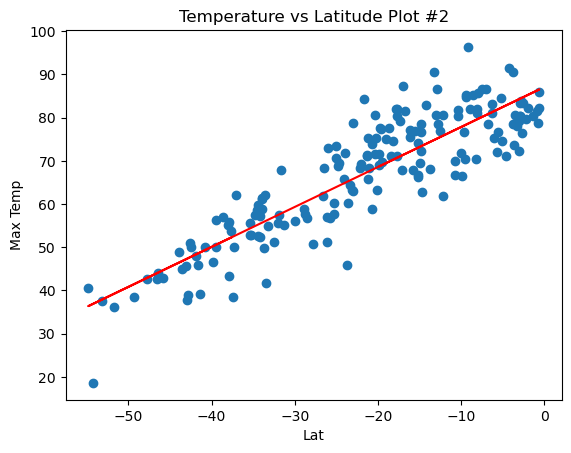

The FINAL R VALUE ==  0.77747669011632
DISCUSSION: This relationship indicates a positive correlation in relation to lat and temp, as latitude increases, so does temp


In [31]:
from sklearn.linear_model import LinearRegression

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

rv_2 = display_regression(x, y, 'Temperature vs Latitude Plot #2', 'Max Temp', (18,0))

print("The FINAL R VALUE == ", rv_2)

print('DISCUSSION: This relationship indicates a positive correlation in relation to lat and temp, as latitude increases, so does temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

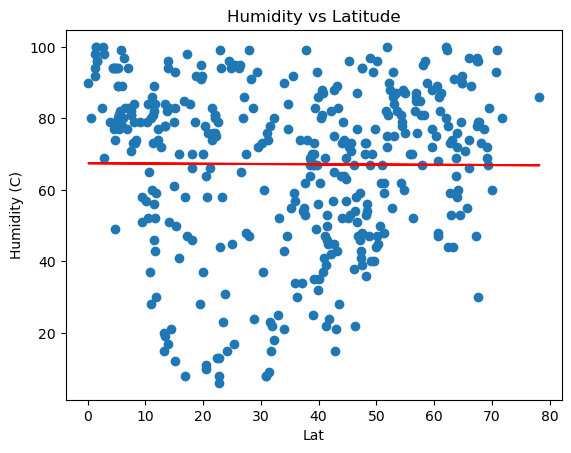

The FINAL R VALUE ==  3.872112762615121e-05


In [32]:

x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

rv_3 = display_regression(x, y, 'Humidity vs Latitude', 'Humidity (C)', (18,0))

print("The FINAL R VALUE == ", rv_3)


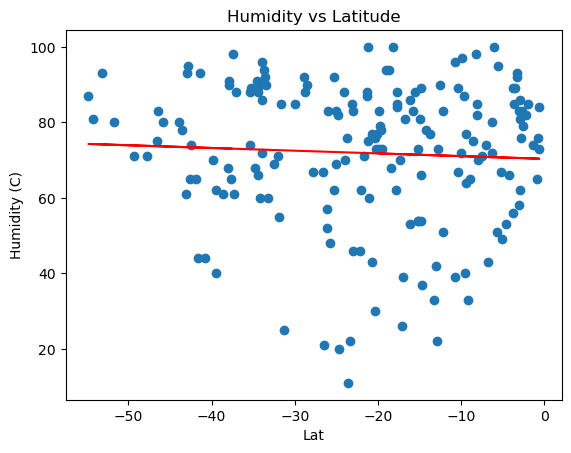

The FINAL R VALUE ==  0.0027348087650759245
DISCUSSION: The r value highlights a weak/bad correlation between humidity and lat. 


In [33]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

rv_3 = display_regression(x, y, 'Humidity vs Latitude', 'Humidity (C)', (18,0))

print("The FINAL R VALUE == ", rv_3)

print('DISCUSSION: The r value highlights a weak/bad correlation between humidity and lat. ')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

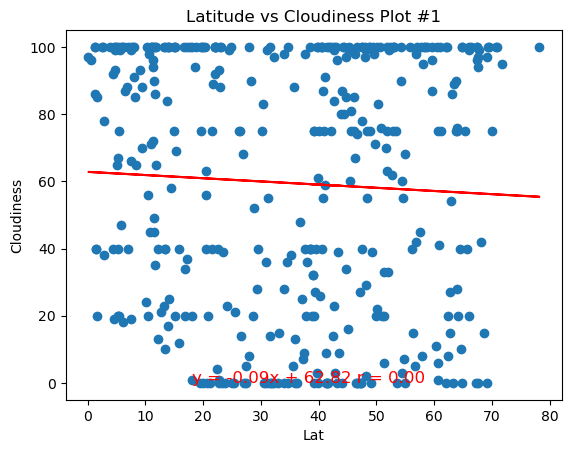

The FINAL R Value =  0.0024762563340375854
Discussion = This graph gives insight in relation to the fact that as latitude increases, cloudiness will moderately increase as well.


In [34]:
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

rv_1 = display_regression(x, y, 'Latitude vs Cloudiness Plot #1', 'Cloudiness', (18,0))

print("The FINAL R Value = ", rv_1)
print("Discussion = This graph gives insight in relation to the fact that as latitude increases, cloudiness will moderately increase as well.")


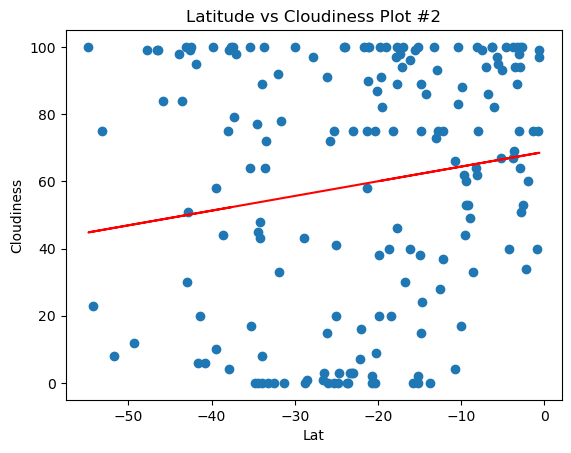

The FINAL R Value =  0.0259391383202493
Discussion = This graph provides a weak insight regarding the relationship between lat/cloudiness. This is because of the r value of 0.02


In [36]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

rv_1 = display_regression(x, y, 'Latitude vs Cloudiness Plot #2', 'Cloudiness', (18,0))

print("The FINAL R Value = ", rv_1)
print("Discussion = This graph provides a weak insight regarding the relationship between lat/cloudiness. This is because of the r value of 0.02")



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

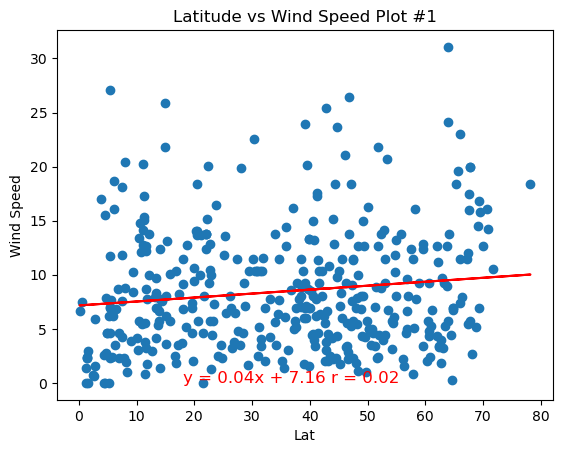

The FINAL R Value =  0.017103019090410787
Discussion = This graph gives a weak correlation as well due to the r value of 0.01


In [37]:
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

rv_1 = display_regression(x, y, 'Latitude vs Wind Speed Plot #1', 'Wind Speed', (18,0))

print("The FINAL R Value = ", rv_1)
print("Discussion = This graph gives a weak correlation as well due to the r value of 0.01")


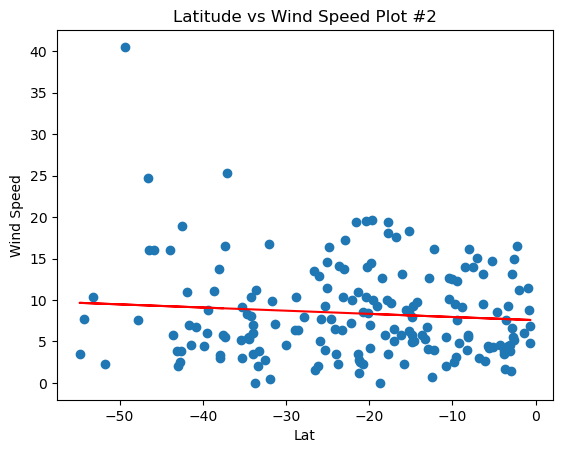

The FINAL R Value =  0.008607372154537885


In [39]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

rv_1 = display_regression(x, y, 'Latitude vs Wind Speed Plot #2', 'Wind Speed', (18,0))

print("The FINAL R Value = ", rv_1)

**Discussion about the linear relationship:** YOUR RESPONSE HERE